In [36]:
import time
import getpass
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC

In [37]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://instagram.com/accounts/login/')

C:\Users\Vyom\AppData\Local\Temp/ipykernel_3308/3840375834.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [38]:
input1 = driver.find_elements(By.XPATH, '//input[@class="_2hvTZ pexuQ zyHYP"]')
input1[0].send_keys(SAMPLE_USER)
input1[1].send_keys(SAMPLE_PASS)
submit = driver.find_element(By.XPATH, '//div[@class="             qF0y9          Igw0E     IwRSH      eGOV_       acqo5   _4EzTm    bkEs3                          CovQj                  jKUp7          DhRcB                                                    "]')
submit.click()

In [4]:
search = driver.find_element(By.XPATH, '//div[@class="eyXLr"]')
search.click()

In [39]:
import re
d = {}
i = 0
for i in range(10):
    s1 = False
    while s1 == False:
        try:
            search = WebDriverWait(driver, 1).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="eyXLr"]')))
            search.click()
            searchbox = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[@placeholder="Search"]')))
            searchbox.send_keys("food") 
            handles = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@role="none"]')))
            wait = WebDriverWait(driver, 10).until(EC.element_to_be_clickable(handles[i]))
            handles[i].click()
            s1 = True
        except:
            pass
    succeed = False
    while succeed==False:
        try:
            followers = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[@class="_aacl _aacp _aacu _aacx _aad6 _aade"]')))
            follower = followers[1].text.split()[0]
            follower = "".join(follower.split(','))
            succeed = True
        except:
            pass
    if follower[-1] == "M":
        if len(follower.split('.')) == 1:
            follower = follower[0:-1] + "000000"
        else:
            follower = "".join(follower.split('.'))[0:-1] + "00000"
    if follower[-1] == "K":
        if len(follower.split('.')) == 1:
            follower = follower[0:-1] + "000"
        else:
            follower = "".join(follower.split('.'))[0:-1] + "00"
    name = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//h2[@class='_aacl _aacs _aact _aacx _aada']")))   
    d[name.text] = int(follower)
    driver.back()
    driver.refresh()

In [40]:
values = np.array(list(d.values()))
accounts = np.array(list(d.keys()))
argInd = values.argsort()
values = values[argInd[::-1]]
accounts = accounts[argInd[::-1]]
accounts = accounts[0:5]
d1 = {}
i = 0
for account in accounts:
    base_url = 'https://instagram.com/'
    url = base_url + account
    driver.get(url)
    time.sleep(1)
    post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_aagw"]')))
    post.click()
    t2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[@class="_aaqe"]')))
    t = t2.get_attribute('datetime')
    today = datetime.today()
    t1 = t[8:10]+'/'+t[5:7]+'/'+t[2:4]
    dt = datetime.strptime(t1, '%d/%m/%y')
    l = today - dt
    ctr = 1 
    i += 1
    while l.days <= 3:
        next_post = driver.find_element(By.XPATH, '//div[@class=" _aaqg _aaqh"]')
        next_post.click()
        post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[@class="_aaqe"]')))
        t = post.get_attribute('datetime')
        t1 = t[8:10]+'/'+t[5:7]+'/'+t[2:4]
        dt = datetime.strptime(t1, '%d/%m/%y')
        l = today - dt
        ctr+= 1
    d1[account] = ctr
    driver.refresh()
    time.sleep(5)


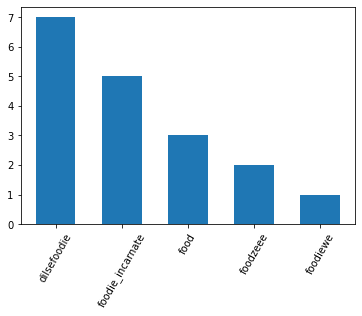

In [41]:
values = np.array(list(d1.values()))
accounts = np.array(list(d1.keys()))
argInd = values.argsort()
values = values[argInd[::-1]]
accounts = accounts[argInd[::-1]]
accounts = accounts[0:5]
values = values[0:5]
plt.bar(accounts, values, width=0.6)
plt.xticks(rotation=60)
plt.show()

In [42]:
import numpy as np
from datetime import date
from datetime import datetime
import time
values = np.array(list(d.values()))
accounts = np.array(list(d.keys()))
argInd = values.argsort()
values = values[argInd[::-1]]
accounts = accounts[argInd[::-1]]
accounts = accounts[0:5]
d2 = {}
i = 0
for account in accounts:
    base_url = 'https://instagram.com/'
    url = base_url + account
    driver.get(url)
    time.sleep(1)
    post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_aagw"]')))
    post.click()
    l = []
    for i in range(5):
        try:
            post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[@class="_aaqe"]')))
            desc = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="_aacl _aaco _aacu _aacx _aad7 _aade"]')))
            l.append(desc.text)
            time.sleep(2)
            next_post = driver.find_element(By.XPATH, '//div[@class=" _aaqg _aaqh"]')
            next_post.click()
        except:
            break
    d2[account] = l
    driver.back()
    driver.refresh()
    time.sleep(5)


In [43]:
import pandas as pd
all_captions = list(d2.values())
pattern = "#(\w+)"
hashtags = []
for captions in all_captions:
    for caption in captions:
        r = re.findall(pattern, caption)
        hashtags+= r
hashtags = np.array(hashtags)
values, counts = np.unique(hashtags, return_counts=True)
a = []
for i in range(len(values)):
    a1 = []
    a1.append(values[i])
    a1.append(counts[i])
    a.append(a1)
df = pd.DataFrame(a, columns =['Word', 'Frequency'])
df.to_csv('hashtags.csv',index=False)

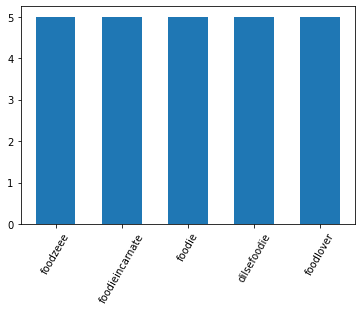

In [44]:
df = df.sort_values(by='Frequency')
plt.xticks(rotation=60)
plt.bar(df.tail(5)['Word'], df.tail(5)['Frequency'], width=0.6)
plt.show()

In [45]:
import numpy as np
from datetime import date
from datetime import datetime
import time
values = np.array(list(d.values()))
accounts = np.array(list(d.keys()))
argInd = values.argsort()
values = values[argInd[::-1]]
accounts = accounts[argInd[::-1]]
accounts = accounts[0:5]
d3 = {}
i = 0
for account in accounts:
    base_url = 'https://instagram.com/'
    url = base_url + account
    driver.get(url)
    time.sleep(1)
    post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_aagw"]')))
    post.click()
    l = []
    for i in range(5):
        post = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[@class="_aaqe"]')))
        
        try:
            likes = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@role="link"]//div[@class="_aacl _aaco _aacw _adda _aacx _aada _aade"]')))
            l.append(int("".join("".join(likes.text.split()[0]).split(','))))
        except:
            i = i -1
            
        time.sleep(2)
        try:
            next_post = driver.find_element(By.XPATH, '//div[@class=" _aaqg _aaqh"]')
            next_post.click()
        except:
            driver.back()
            break
    d3[account] = l
    driver.back()
    driver.refresh()
    time.sleep(5)

In [46]:
likers = list(d3.values())
d4 = {}
perople = list(d3.keys())
for i in range(5):
    li = np.array(likers[i])
    sum1 = np.sum(li)/5
    d4[perople[i]] = sum1

In [49]:
keys = list(d4.keys())
d5 = {}

for key in keys:
    d5[key] = d4[key]/d[key]

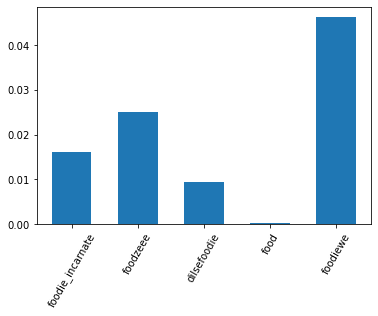

In [50]:
keys = list(d5.keys())
values = list(d5.values())

plt.xticks(rotation=60)
plt.bar(keys, values, width=0.6)
plt.show()